# INSTRUCTIONS: 
* Make your own copy of the Notebook before starting the assignment. 
  **File** -> **save a copy in Drive**

* Fill the place holders in the notebook which are indicated with `FILL`.

# PREREQUISITES
* The datasets need to be downloaded. Please download and unzip the `Gestures.zip` to find the datasets (Punch and Flex gestures)

# UPLOAD:
A `zip` file containing
1. The completed notebook.
2. The TF Lite micro model (The header file)


# The requirement:

You are asked to create a Gesture Detection model for MCUs that can detect a ***punch*** or a ***flex*** gesture by a potential client. The clients would like to recognise any gestures using the data gathered by the onboard ***IMU (Inertial Measurement Unit)*** that provides Gyroscopic and Accelerometer data.



## Prerequisites
I have used my own dataset
Download the `PunchFiltered.csv` and `FlexFiltered.csv` files into a local folder from [this](https://drive.google.com/drive/folders/1srh0-_dL9kl_smUPqLtlK1Kzj44sCIDH?usp=share_link) link

Acknowledgement:

Contents of the notebook are based on Don Coleman, Sandeep Mistry's Gesture recognition exercise 

### Important preliminary libraries

import the necessary libraries that you see fit. `Numpy`, `Pandas` and `Tensorflow` are mandatory

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#### Method used by me:
* Uploading the `punch.csv` & `flex.csv` into the colab session using `google.colab.files`

#### Alternatively you can...:
1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

In [6]:
from google.colab import files

uploaded = files.upload()

Saving FlexFiltered.csv to FlexFiltered.csv
Saving PunchFiltered.csv to PunchFiltered.csv


# Flex Data

Reading and analysing the data imported. You can use a special function in `Pandas` to read a CSV file

In [8]:
flex = pd.read_csv("FlexFiltered.csv")

In [9]:
flex.info()

# if you look closely at the output, it seems like there's a null value in the column "aY" 
# (All others are 3690, aY is 3689 - One data point is missing)
# Read the cell below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12019 entries, 0 to 12018
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aX      12019 non-null  float64
 1   aY      12019 non-null  float64
 2   aZ      12019 non-null  float64
 3   gX      12019 non-null  float64
 4   gY      12019 non-null  float64
 5   gZ      12019 non-null  float64
dtypes: float64(6)
memory usage: 563.5 KB


Visualising the data

Now that you have gotten rid of any null values in the dataset. Let's visualize the data.

In [10]:
flex_index = range(1, len(flex['aX']) + 1) # The range of data we want to visualize

The line for `aX` has been plotted. Do the same for `aY` and `aZ`

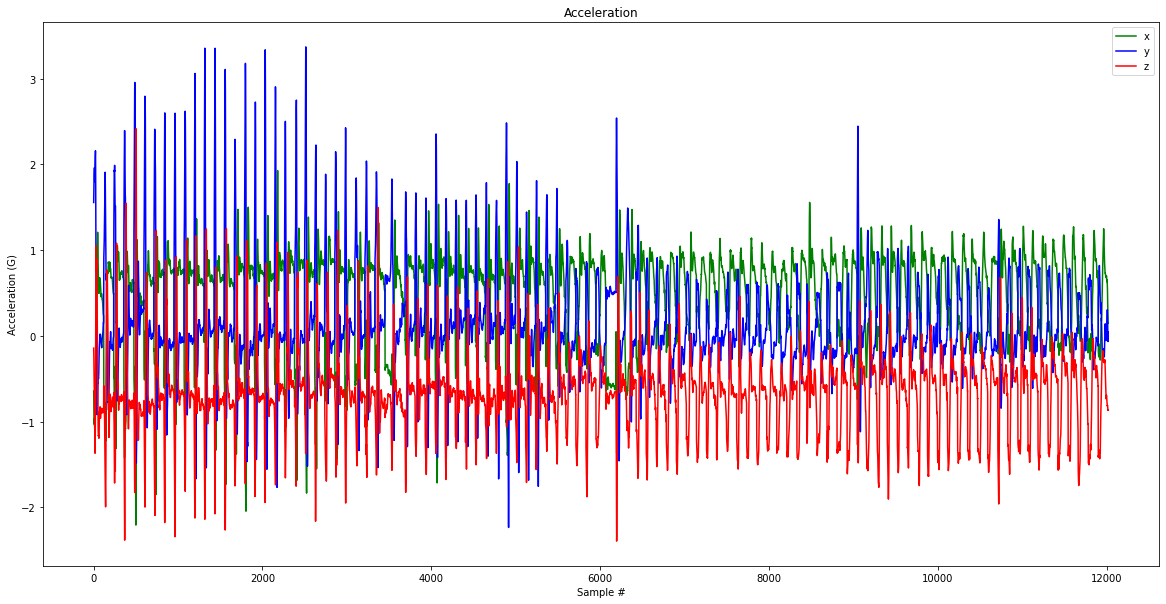

In [11]:
plt.figure(figsize=(20,10)) #Setting the figure size 
plt.plot(flex_index, flex['aX'], 'g', label='x')

# FILL
plt.plot(flex_index, flex['aY'], 'b', label='y')
plt.plot(flex_index, flex['aZ'], 'r', label='z')

plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

Copy the contents of the previous cell and try to visualize the data for the Gyroscope data

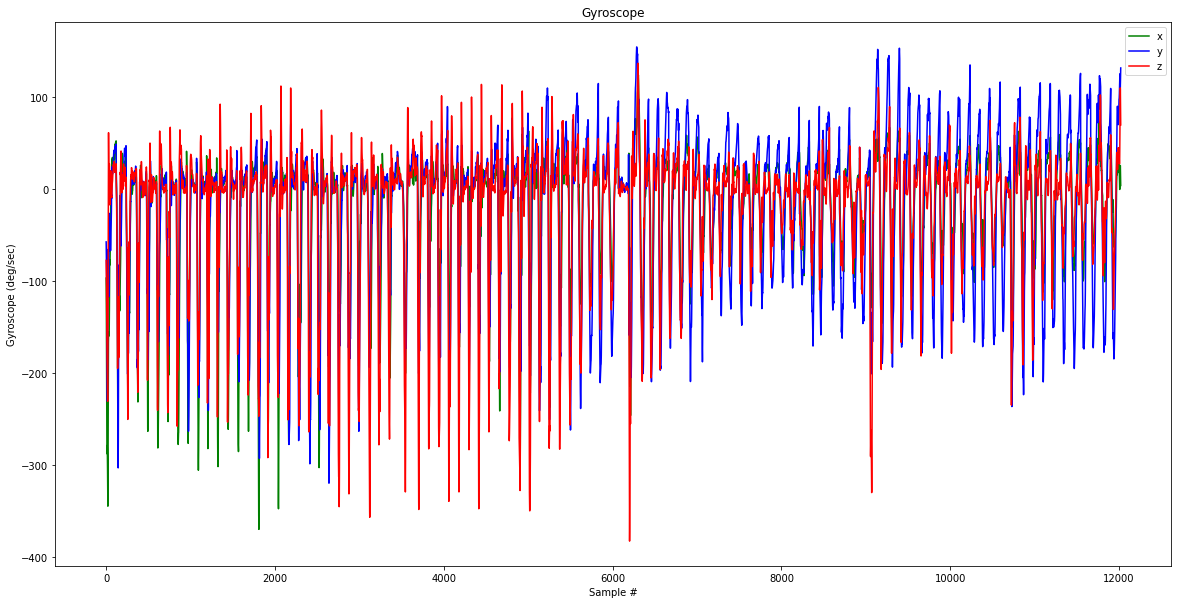

In [12]:
# FILL
plt.figure(figsize=(20,10))
plt.plot(flex_index, flex['gX'], 'g', label='x')
plt.plot(flex_index, flex['gY'], 'b', label='y')
plt.plot(flex_index, flex['gZ'], 'r', label='z')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

# Punch

Read the Punch data. Analyse to see if there are any null values using the `.info()` function.

In [14]:
punch = pd.read_csv("PunchFiltered.csv")

Call the `.info()` function here to see if there are any null values in the dataset.

In [15]:
# <DataFrame>.info()
# FILL
punch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12019 entries, 0 to 12018
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aX      12019 non-null  float64
 1   aY      12019 non-null  float64
 2   aZ      12019 non-null  float64
 3   gX      12019 non-null  float64
 4   gY      12019 non-null  float64
 5   gZ      12019 non-null  float64
dtypes: float64(6)
memory usage: 563.5 KB


In [16]:
punch_index = range(1, len(punch['aX']) + 1)

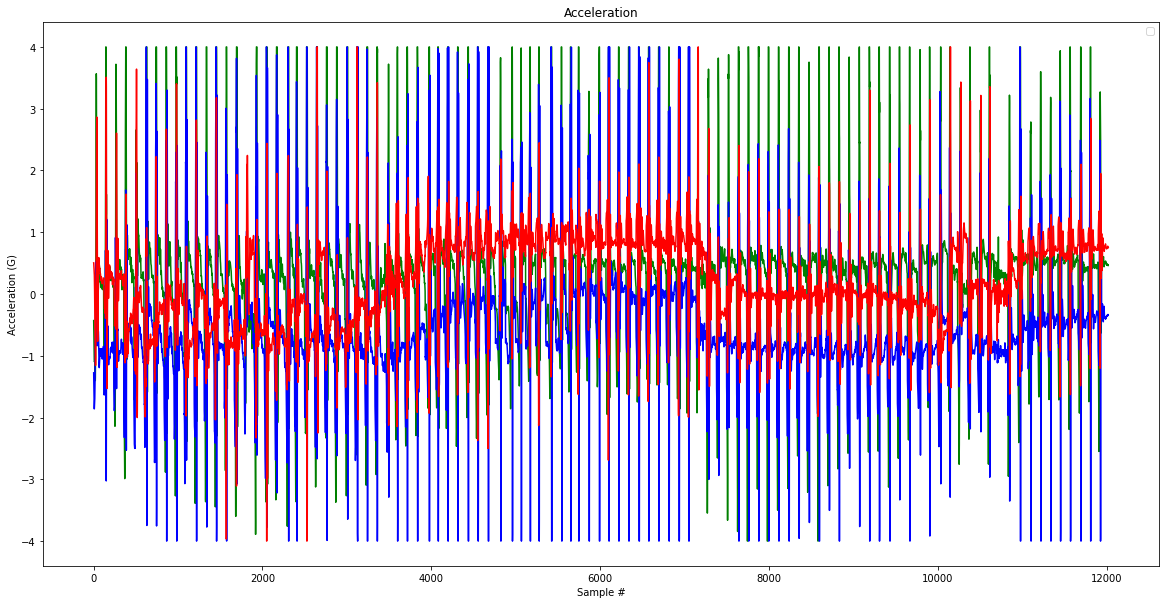

In [17]:
plt.figure(figsize=(20,10))
plt.plot(punch_index, punch['aX'], 'g')
plt.plot(punch_index, punch['aY'], 'b')
plt.plot(punch_index, punch['aZ'], 'r')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

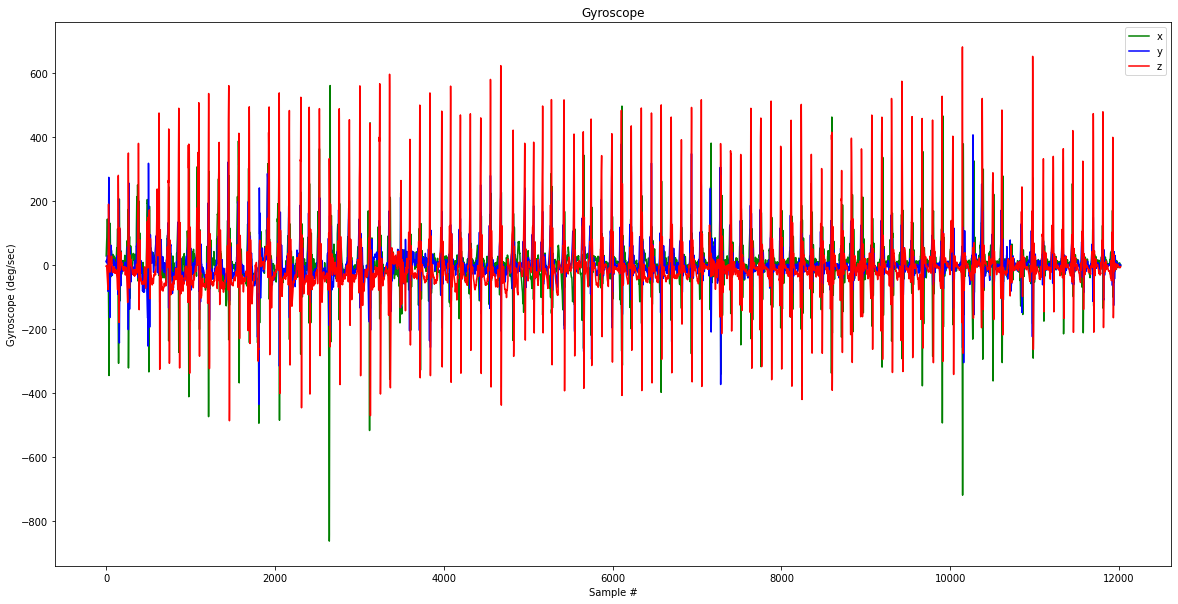

In [18]:
plt.figure(figsize=(20,10))
plt.plot(punch_index, punch['gX'], 'g', label='x')
plt.plot(punch_index, punch['gY'], 'b', label='y')
plt.plot(punch_index, punch['gZ'], 'r', label='z')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

# Compiling the dataset

Add the names of the `csv` files inside the array.

In [22]:
# Constants
SEED = 1337
SAMPLES_PER_GESTURE = 119 # <-- Fixed sample rate of the Arduino Nano 33 BLE IMU (Hz)

GESTURES = ["PunchFiltered", "FlexFiltered"]
    # FILL
NUM_GESTURES = len(GESTURES) # 2

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
print(ONE_HOT_ENCODED_GESTURES)

# create a one-hot encoded matrix that is used in the output
# ONE_HOT_ENCODED_GESTURES = # FILL

[[1. 0.]
 [0. 1.]]


### Creating the dataset

1. Uncomment line 11. Here get the `gesture index` and retrieve the labels for the corresponding the dataset for that iteration.

2. Normalize the respective data for each of the sensors. 2 samples have been provided (Line 27)

3. Append the newly created sub list (`tensor`) and output into `inputs` and `outputs` in line 34

4. Uncomment line 38. Convert and assign the current `outputs` list to a numpy array and assign it to itself. Remember, Python is dynamically typed -- It can change a variables type instantly.

In [24]:
# Reproducability(will make sure same random numbers will be produced)
np.random.seed(SEED)
tf.random.set_seed(SEED)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]  # "punch"
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"There are {num_recordings} recordings of the {gesture} gesture (Index #{gesture_index}).")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j

      # Normalizing the data
      # between -4 and +4 for Acceleration
      # between -2000 and 2000 for gyroscopic data
      # convert them to 0 and 1
      tensor += [
          (df['aX'][index] + 4) / 8,
          #FILL
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          #FILL
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)
    #input list contain the six values ax,ay,az,gx,gy,gz which are normalized to 0 to 1 and output list contain the relevant label

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

# print(inputs[0])

print("Completed dataset preparation.")

There are 101 recordings of the PunchFiltered gesture (Index #0).
There are 101 recordings of the FlexFiltered gesture (Index #1).
Completed dataset preparation.


#### Why is normalising important?

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.([developer.google](https://developers.google.com/machine-learning/data-prep/transform/normalization#:~:text=The%20goal%20of%20normalization%20is,training%20stability%20of%20the%20model.))

In [25]:
inputs_count = len(inputs)
#FILL
randomize = np.arange(inputs_count)
print(randomize)
#FILL
np.random.shuffle(randomize)
print(randomize)

inputs = inputs[randomize]
# outputs = # FILL
outputs = outputs[randomize]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201]
[ 56 175  25 143  69  74  53 176  99 170  21 126 178  32  14 123  28 150
 165  39  98 117 107  35  63  94  97  95 157  55  29 155  86  24 110  42
  13  52 135   2  54  36  80 154 

Line 6: Create three sets (training, testing and validation) for both input and output arrays. To achieve this you can use numpys `.split()` function.

Remember that you can check the documentation of the function by hovering over it on Colab (Shift + Tab) on Jupyter notebooks

In [26]:
# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * inputs_count)
TEST_SPLIT = int(0.2 * inputs_count + TRAIN_SPLIT)

# FILL
print(TRAIN_SPLIT)
print(TEST_SPLIT)

X_train, X_test, X_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print(len(X_test))

print("Data set randomization and splitting complete.")



121
161
40
Data set randomization and splitting complete.


# Creating the model

In [32]:
# build the model and train it
# model = #FILL 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])
history = model.fit(X_train, y_train, epochs=40, batch_size=1, validation_data=(X_validate, y_validate))

Epoch 1/40
121/121 [==============================] - 1s 4ms/step - loss: 0.2479 - mae: 0.4843 - accuracy: 0.5620 - val_loss: 0.2486 - val_mae: 0.4982 - val_accuracy: 0.4878
Epoch 2/40
121/121 [==============================] - 0s 4ms/step - loss: 0.2440 - mae: 0.4918 - accuracy: 0.5785 - val_loss: 0.2299 - val_mae: 0.4791 - val_accuracy: 0.9512
Epoch 3/40
121/121 [==============================] - 1s 5ms/step - loss: 0.2218 - mae: 0.4654 - accuracy: 0.6860 - val_loss: 0.2032 - val_mae: 0.4489 - val_accuracy: 0.9756
Epoch 4/40
121/121 [==============================] - 0s 3ms/step - loss: 0.1286 - mae: 0.3448 - accuracy: 0.9835 - val_loss: 0.0601 - val_mae: 0.2328 - val_accuracy: 0.9756
Epoch 5/40
121/121 [==============================] - 0s 3ms/step - loss: 0.0398 - mae: 0.1734 - accuracy: 0.9917 - val_loss: 0.0263 - val_mae: 0.1360 - val_accuracy: 1.0000
Epoch 6/40
121/121 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0974 - accuracy: 0.9917 - val_loss: 0.02

# Plotting loss graph

Uncomment lines 5 and 6. Retrieve the training and validation losses using the `history` object. Afterwards plot the graph

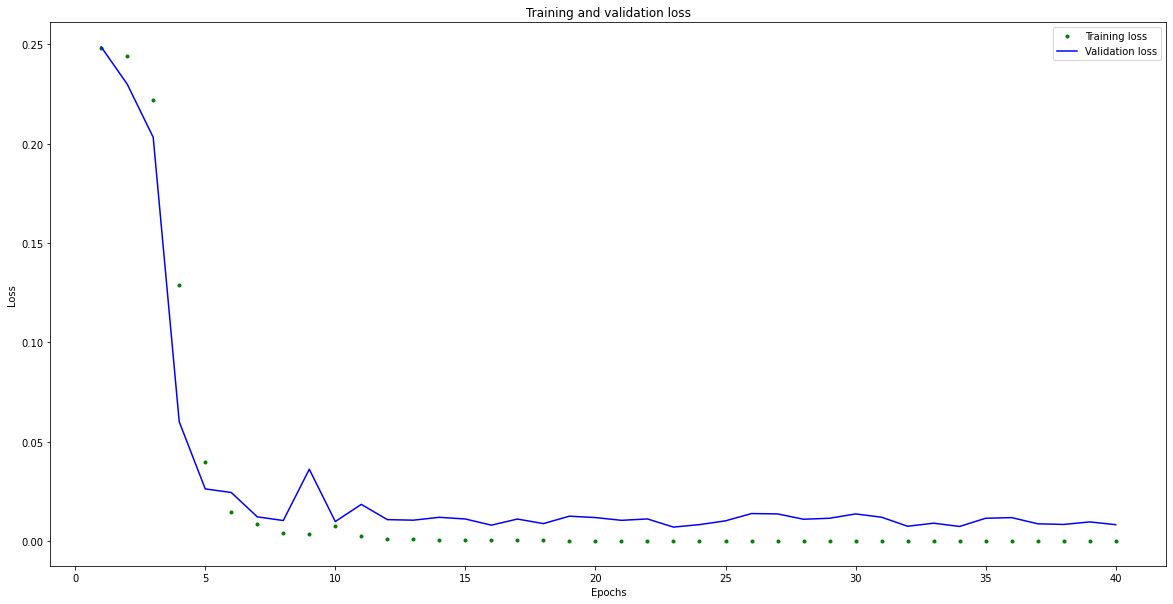

In [33]:
# increase the size of the graphs. The default size is (6,4).
plt.figure(figsize=(20,10))

# graph the loss, the model above is configure to use "mean squared error" as the loss function
# loss = # FILL
# val_loss = # FILL
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Accuracy Graphs

Similar to the loss graph, retrieve the accuracies for training and validation and plot the graph.

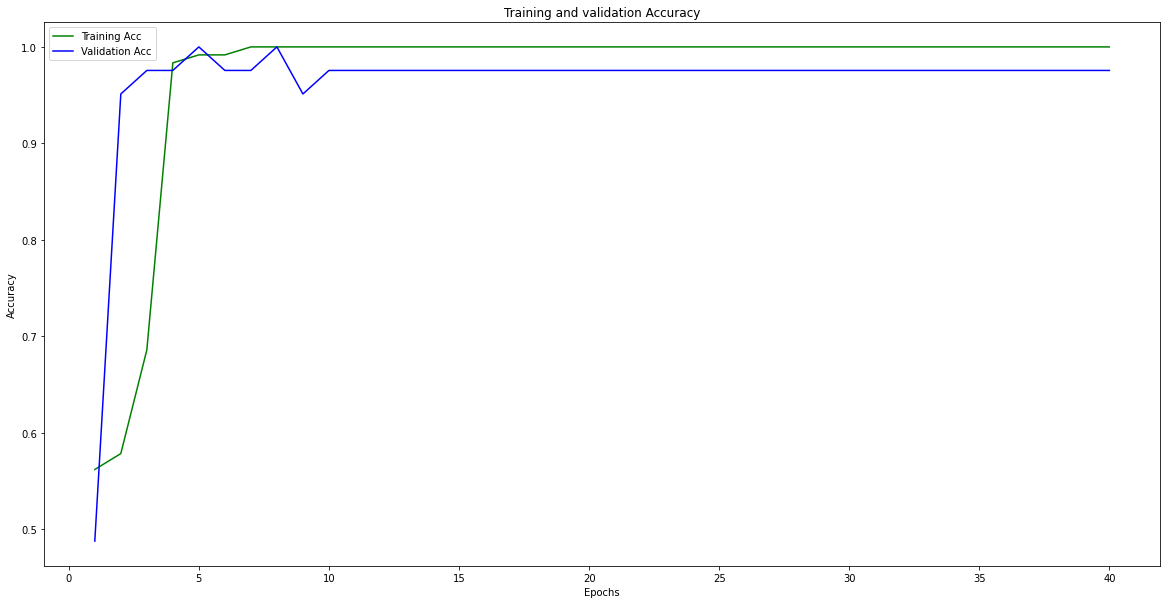

In [34]:
# graph of mean absolute error
plt.figure(figsize=(20,10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1. Uncomment line 2 and use the trianed model to make predictions using the test data that was previously split. 

2. Plot the predictions to see how far off your model is with the actual labels.

2/2 [==============================] - 0s 5ms/step
predictions =
 [[0.006 0.994]
 [0.998 0.002]
 [0.991 0.009]
 [0.004 0.996]
 [0.916 0.084]
 [0.006 0.994]
 [0.002 0.998]
 [0.999 0.001]
 [0.999 0.001]
 [0.001 0.999]
 [1.    0.   ]
 [0.002 0.998]
 [0.007 0.993]
 [0.008 0.992]
 [0.003 0.997]
 [0.005 0.995]
 [0.999 0.001]
 [0.997 0.003]
 [0.999 0.001]
 [0.997 0.003]
 [0.011 0.989]
 [0.994 0.006]
 [0.999 0.001]
 [0.005 0.995]
 [0.002 0.998]
 [0.007 0.993]
 [0.002 0.998]
 [0.005 0.995]
 [0.992 0.008]
 [0.002 0.998]
 [0.008 0.992]
 [0.997 0.003]
 [0.049 0.951]
 [0.999 0.001]
 [0.008 0.992]
 [0.004 0.996]
 [1.    0.   ]
 [0.997 0.003]
 [0.999 0.001]
 [0.004 0.996]]
actual =
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  del sys.path[0]


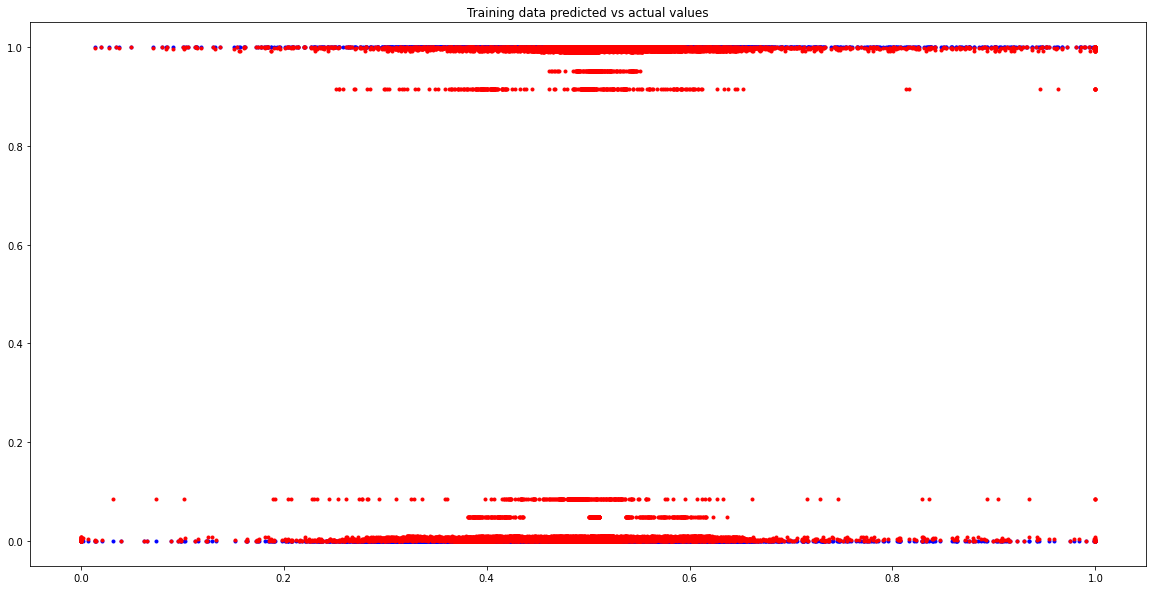

In [35]:
# use the model to predict the test inputs
# predictions = # FILL (1)
predictions = model.predict(X_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", y_test)

# Plot the predictions along with to the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values')
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, predictions, 'r.', label='Predicted')
plt.show()

# Model conversion

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 148280 bytes


# Creating C/C++ Header file for the model

In [37]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 914,428 bytes.
